### Import Library

In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [165]:
## Concating all files

files = [file for file in os.listdir("./Monthly Sales Report")]

all_months_report = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Monthly Sales Report/" + file)
    all_months_report = pd.concat([all_months_report, df])

all_months_report.to_csv("all_data.csv")

In [3]:
## Reading new created all_data files

repo = pd.read_csv("all_data.csv")
repo.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
## Checking null values

repo[repo.isnull().any(axis=1)]


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,1,NaN,NaN,NaN,NaN,NaN,NaN
356,356,NaN,NaN,NaN,NaN,NaN,NaN
735,735,NaN,NaN,NaN,NaN,NaN,NaN
1433,1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,10012,NaN,NaN,NaN,NaN,NaN,NaN
185438,10274,NaN,NaN,NaN,NaN,NaN,NaN
186042,10878,NaN,NaN,NaN,NaN,NaN,NaN
186548,11384,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
## Dropping unnecessary column

repo = repo.drop(repo.columns[0], axis=1)
repo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
# Dropping null values

repo = repo.dropna(how='all').reset_index(drop=True)
repo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
# Dropping any unnecessary values

repo = repo[~repo['Order Date'].str.contains('Or', case=False, na=False)]

# Question!

### What the best month for sales?
in this case we can pick data for each month from Order Date Column

In [20]:
# Making new Month column

repo['Month'] = repo['Order Date'].str[0:2]
repo['Month'] = repo['Month'].astype('int')
repo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [21]:
# Changing the respective column types into integer

repo['Quantity Ordered'] = pd.to_numeric(repo['Quantity Ordered'])
repo['Price Each'] = pd.to_numeric(repo['Price Each'])

In [22]:
# Making new Sales result column

repo['Sales'] = repo['Quantity Ordered']*repo['Price Each']
repo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [65]:
# Showing the result

monthly_sales = repo.groupby('Month')['Sales'].sum()
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [70]:
# Sorting the result from the highest

monthly_sales.sort_values(ascending=False)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

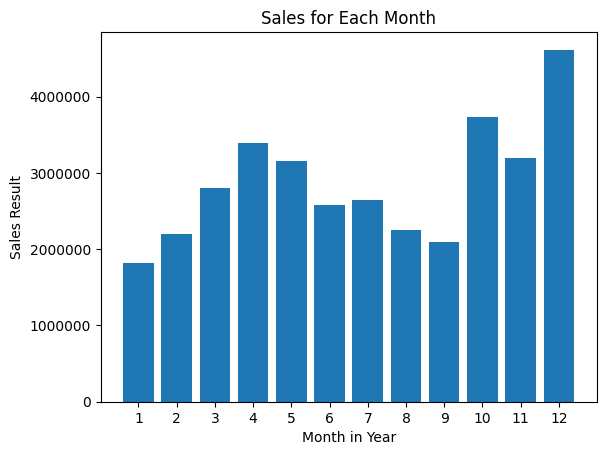

In [68]:
# Visualizing the result using matplotlib

months = range(1,13)
plt.bar(months, monthly_sales)
plt.title('Sales for Each Month')
plt.xticks(months)
plt.xlabel('Month in Year')
plt.ylabel('Sales Result')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##### From the graphic that shown above, we can conclude that December is the most profitting for our sales followed by October and April. So it's recommended to increased our products quality and quantity in December, October, and April due to it's profitting sales

### What city sold the most product?
Same like before, to get the city data we can pick it up from purchase address

In [23]:
# Making new City column

def get_city(address):
    return address.split(',')[1]

repo['City'] = repo['Purchase Address'].apply(lambda x: get_city(x))
repo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [72]:
# Result

city_sale = repo.groupby('City')['Sales'].sum()
city_sale

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [73]:
# Sorting the result from the highest

city_sale.sort_values(ascending=False)

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales, dtype: float64

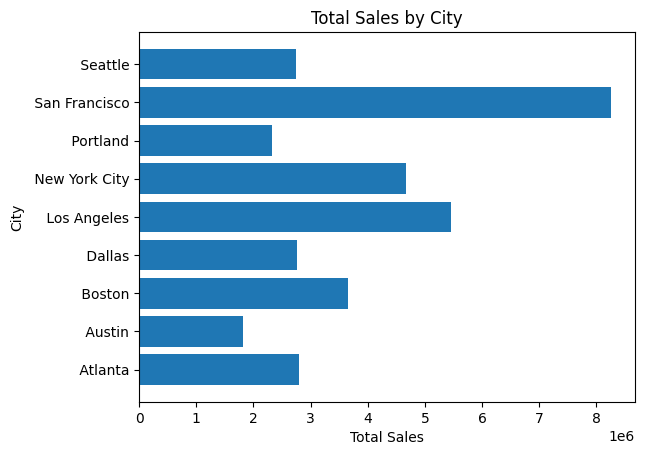

In [77]:
# Visualizing into bar chart

plt.barh(city_sale.index, city_sale)
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Total Sales by City')
plt.show()

##### From graphic above we can conclude that San Francisco is the most saleable city for our products as it's has the most highest selling followed by Los Angeles and NYC. So it for the best if we starting to increased our products quantity in the said city and considering to increasing our advertisement in the less saleable city like Austin and Portland.

### What time should we display advertisement?
To achieve this we can took the time from Order Date

In [24]:
# Making new Hour column

repo['Order Date'] = pd.to_datetime(repo['Order Date'], format='%m/%d/%y %H:%M')

repo['Hour'] =  repo['Order Date'].dt.hour
repo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [88]:
# Summed hour and sales

time_sold = repo.groupby('Hour')['Sales'].sum()
time_sold

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

In [91]:
# Sorting the result from the highest

time_sold.sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

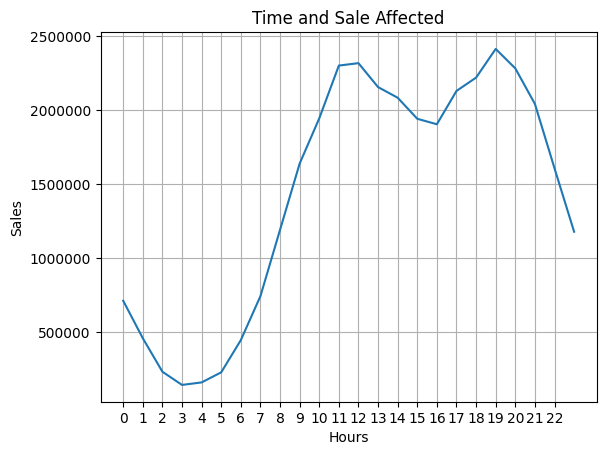

In [98]:
# Visualizing 

time = range(0,23)
plt.plot(time_sold.index, time_sold)
plt.xticks(time)
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.title('Time and Sale Affected')
plt.show()

##### From the graphic shown above, it's better to display our advertisement at the most optimal hours which is 7 p.m and 12 p.m. Theres many customers that buys our products at that specific time. Considering 7 p.m is the time when most of peoples already back from their works and the most comfortable time to start to go out at night. 12 p.m also one of the optimal hours because at that time mostly is a lunch break time from school or work so people can slipped by to our products.

### What products are most often sold together?

In [65]:
repo2 = repo.copy()
repo2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [66]:
repo2 = repo2[repo2.duplicated(subset=['Order ID'], keep=False)]
repo2['Pair'] = repo2.groupby('Order ID')['Product'].transform(lambda x: ", ".join(x))

In [67]:
repo2 = repo2[['Order ID', 'Pair']].drop_duplicates()
repo2.head()

,Order ID,Pair
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [88]:
count = Counter()

for row in repo2['Pair']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


##### From the results shown above its make sense that products that often sold together is a mobile phone and its charging cable. Beside charging cable, wired headphones also popular to be paired up with mobile phones as additional feature for their mobile phone

### What product sold the most?
To achieve this we can summed each product and see which one appear the most and have the largest quantities

In [78]:
sold_most = repo.groupby('Product')['Quantity Ordered'].sum()
sold_most

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [79]:
sold_most.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

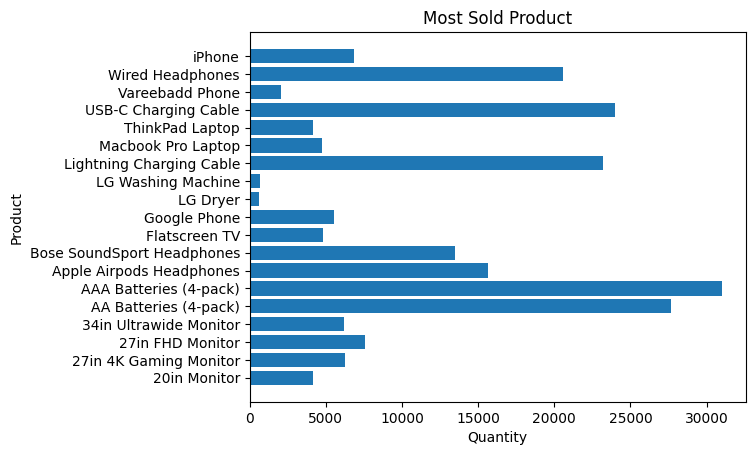

In [83]:
plt.barh(sold_most.index, sold_most)
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.title('Most Sold Product')
plt.show()

##### We can see that the most sold products in our business was a batteries and mobile phone complementary. Almost all of the electronics device especially smart device need a batteries to be functionable. So it was make sense for batteries to be the most sold products. The same with mobile phone complementary like charging cable and headphones to be popular too as in mobile phones are a must have things nowadays